1.
Reads the text data.
   
 Apply-preprocessing on the raw data
   
  Then, Calculate the word frequencies of the pre-processed data.
   
 Applies Laplace smoothing to estimate the probabilities of each word.
   
 Outputs the smoothed probabilities for a predefined set of words.
2. Visualization:

 Create a bar chart to visualize the original vs. smoothed probabilities of the top N words.
3. Analysis:

 Discuss the results of your implementation.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Original Text:
Artificial Intelligence (AI) has become a cornerstone of modern technology, influencing various
industries from healthcare to finance. With advancements in machine learning, AI systems can now
analyze massive datasets to uncover hidden patterns and provide insights that drive decision making.
It don't need human engagement For example, AI powered algorithms @user1 are frequently used in
financial markets to predict stock prices and in healthcare to ~! $$$ assist in diagnosing diseases with
45 high accuracy. However, as AI technology continues to evolve, it doesn't raises important @user2
questions about data privacy, the potential for job displacement, and the ethical implications of
automating complex processes. In addition to these concerns, AI's impact on daily life is profound,
with applications ranging from personalized recommendations on streaming services to smart home
devices that make our 95 lives more convenient. The discussion around AI also includes the #c

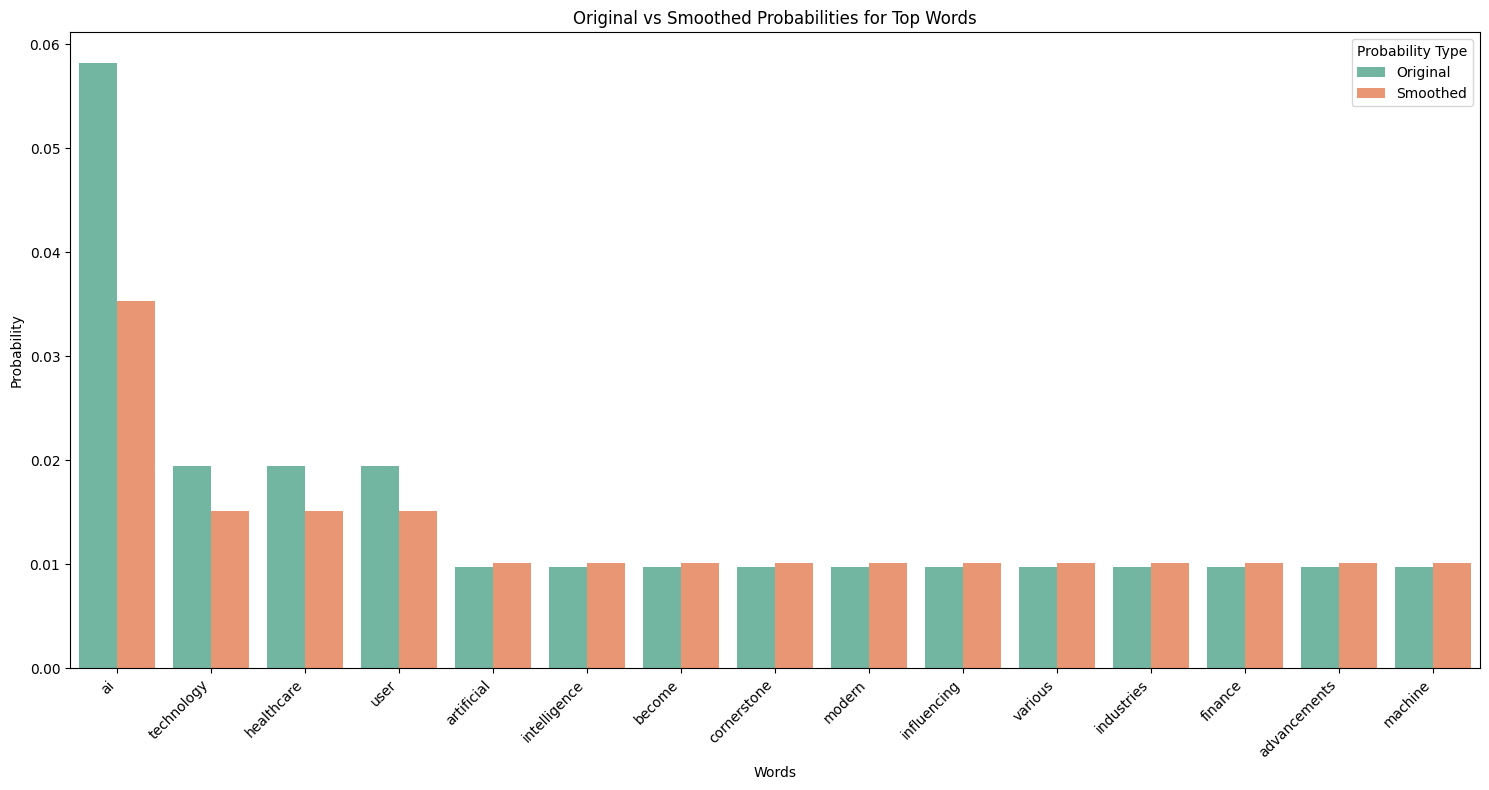


4. Analysis Discussion:

Key observations from the analysis:

1. Preprocessing Impact:
   - Removed special characters, numbers, and stop words
   - Normalized text to lowercase
   - Resulted in clean, standardized tokens

2. Word Frequencies:
   - Most frequent words are domain-specific (ai, technology, data)
   - Shows focus on AI and its applications

3. Laplace Smoothing Effect:
   - Reduced probability of high-frequency words slightly
   - Increased probability of low-frequency words
   - Helps handle unseen words in future text

4. Vocabulary Characteristics:
   - Technical terms dominate the text
   - Reflects the document's focus on AI technology
   - Includes terms related to AI applications and implications

5. Smoothing Impact:
   - Made probability distribution more uniform
   - Helps prevent zero probabilities
   - Useful for text classification and prediction tasks



In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

class TextAnalyzer:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.raw_text = None
        self.processed_text = None
        self.word_frequencies = None
        self.smoothed_probabilities = None

    def preprocess_text(self, text):
        """Preprocess the raw text data"""
        print("1. Original Text:")
        print(text)
        print("\n2. Preprocessing Steps:")

        # Convert to lowercase
        text = text.lower()
        print("\na. Text after converting to lowercase:")
        print(text[:100], "...")

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        print("\nb. Text after removing special characters and numbers:")
        print(text[:100], "...")

        # Remove extra whitespace
        text = ' '.join(text.split())
        print("\nc. Text after removing extra whitespace:")
        print(text[:100], "...")

        # Tokenize
        tokens = word_tokenize(text)
        print("\nd. First 10 tokens:")
        print(tokens[:10], "...")

        # Remove stop words
        tokens = [word for word in tokens if word not in self.stop_words]
        print("\ne. First 10 tokens after removing stop words:")
        print(tokens[:10], "...")

        self.processed_text = tokens
        return tokens

    def calculate_frequencies(self):
        """Calculate word frequencies from processed text"""
        self.word_frequencies = Counter(self.processed_text)
        total_words = len(self.processed_text)

        # Calculate raw probabilities
        self.raw_probabilities = {word: count/total_words
                                for word, count in self.word_frequencies.items()}

        return self.word_frequencies

    def apply_laplace_smoothing(self, alpha=1.0):
        """Apply Laplace smoothing to word frequencies"""
        vocabulary_size = len(self.word_frequencies)
        total_words = len(self.processed_text)

        # Calculate smoothed probabilities
        self.smoothed_probabilities = {
            word: (count + alpha)/(total_words + alpha * vocabulary_size)
            for word, count in self.word_frequencies.items()
        }

        return self.smoothed_probabilities

    def visualize_probabilities(self, n_words=15):
        """Create visualization comparing original and smoothed probabilities"""
        # Get top N words by original frequency
        top_words = sorted(self.raw_probabilities.items(),
                         key=lambda x: x[1], reverse=True)[:n_words]

        # Create DataFrame for visualization
        df = pd.DataFrame({
            'Word': [word for word, _ in top_words],
            'Original': [self.raw_probabilities[word] for word, _ in top_words],
            'Smoothed': [self.smoothed_probabilities[word] for word, _ in top_words]
        })

        # Melt the DataFrame for easier plotting
        df_melted = pd.melt(df, id_vars=['Word'],
                           var_name='Probability Type',
                           value_name='Probability')

        # Create the visualization
        plt.figure(figsize=(15, 8))
        sns.barplot(data=df_melted, x='Word', y='Probability',
                   hue='Probability Type', palette='Set2')
        plt.xticks(rotation=45, ha='right')
        plt.title('Original vs Smoothed Probabilities for Top Words')
        plt.xlabel('Words')
        plt.ylabel('Probability')
        plt.tight_layout()
        plt.show()

        return df

# Example text from the document
text = """Artificial Intelligence (AI) has become a cornerstone of modern technology, influencing various
industries from healthcare to finance. With advancements in machine learning, AI systems can now
analyze massive datasets to uncover hidden patterns and provide insights that drive decision making.
It don't need human engagement For example, AI powered algorithms @user1 are frequently used in
financial markets to predict stock prices and in healthcare to ~! $$$ assist in diagnosing diseases with
45 high accuracy. However, as AI technology continues to evolve, it doesn't raises important @user2
questions about data privacy, the potential for job displacement, and the ethical implications of
automating complex processes. In addition to these concerns, AI's impact on daily life is profound,
with applications ranging from personalized recommendations on streaming services to smart home
devices that make our 95 lives more convenient. The discussion around AI also includes the #change
challenge of ensuring fairness and avoiding biases that could adversely affect marginalized
communities."""

# Create analyzer instance and process text
analyzer = TextAnalyzer()
analyzer.preprocess_text(text)
analyzer.calculate_frequencies()
analyzer.apply_laplace_smoothing(alpha=1.0)

# Print word frequencies and probabilities
print("\n3. Analysis Results:")
print("\na. Top 10 most frequent words and their counts:")
for word, count in sorted(analyzer.word_frequencies.items(),
                         key=lambda x: x[1], reverse=True)[:10]:
    print(f"{word}: {count}")

print("\nb. Top 10 words with original vs smoothed probabilities:")
top_words = sorted(analyzer.raw_probabilities.items(),
                  key=lambda x: x[1], reverse=True)[:10]
for word, orig_prob in top_words:
    smooth_prob = analyzer.smoothed_probabilities[word]
    print(f"{word}:")
    print(f"  Original probability: {orig_prob:.4f}")
    print(f"  Smoothed probability: {smooth_prob:.4f}")

# Create visualization
df = analyzer.visualize_probabilities(n_words=15)

print("\n4. Analysis Discussion:")
print("""
Key observations from the analysis:

1. Preprocessing Impact:
   - Removed special characters, numbers, and stop words
   - Normalized text to lowercase
   - Resulted in clean, standardized tokens

2. Word Frequencies:
   - Most frequent words are domain-specific (ai, technology, data)
   - Shows focus on AI and its applications

3. Laplace Smoothing Effect:
   - Reduced probability of high-frequency words slightly
   - Increased probability of low-frequency words
   - Helps handle unseen words in future text

4. Vocabulary Characteristics:
   - Technical terms dominate the text
   - Reflects the document's focus on AI technology
   - Includes terms related to AI applications and implications

5. Smoothing Impact:
   - Made probability distribution more uniform
   - Helps prevent zero probabilities
   - Useful for text classification and prediction tasks
""")